# Welcome!

[Christy Heaton](christyheaton.github.io), 2017-5-20

Much of this information is modified from that of [Emilio Mayorga](https://github.com/emiliom/), 2017-2-6 and his [Maptime workshop](https://github.com/MaptimeSEA/geopandas-tutorial-maptime).

## Background

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. (From [GeoPandas.org](http://geopandas.org/))

## Notes on Jupyter Notebooks:

* ctrl + Enter runs a cell
* a * in the input box means the process is running and you should wait for it to finish
* Cells with code are in Python, cells with comments are written in Markdown

## Notes on geopandas: 

GeoPandas builds on stable and widely used packages (Pandas, shapely, etc). 

When should you use Geoopandas:

* you need an open source Python solution
* you want to explore your spatial data
* you are comfortable with the concept of dataframes


When should you consider something else:
* Raster data?
* When you need high performance
* When you need polished or interactive maps you should switch to a proper mapping application

## Our problem: which Farmers Markets in King County are NOT within 10,000 feet of a transit route

## Import packages and set up data file path
We'll need these throughout the exercise.

In [4]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from matplotlib
import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point, LineString
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import pyepsg

from shapely.wkt import loads

data_pth = "../Data/"


### Let's read in our first dataset

In [5]:
transit = gpd.read_file(os.path.join(data_pth, "routes.shp"))

### Examine the top 5 rows

In [6]:
transit.head()

,ROUTE,RTE_NUM,RTE_PART,SVC_TYPE,Shape_len,geometry
0,49AS,49,None,AS,29131.311348,(LINESTRING (1274861.849142477 242821.27891846...
1,545EX,545,None,EX,196543.260899,(LINESTRING (1320003.625000477 238360.56211812...
2,541EX,541,None,EX,120346.500296,(LINESTRING (1320003.625000477 238360.56211812...
3,118,118,None,None,30847.145603,(LINESTRING (1254198.670980722 194764.21000655...
4,255,255,None,None,183184.375857,(LINESTRING (1307287.499842227 262350.12503130...


### Find the coordinate system

In [8]:
transit.crs

{u'ellps': u'GRS80',
 u'lat_0': 47,
 u'lat_1': 47.5,
 u'lat_2': 48.73333333333333,
 u'lon_0': -120.8333333333333,
 u'no_defs': True,
 u'proj': u'lcc',
 u'towgs84': u'0,0,0,0,0,0,0',
 u'units': u'us-ft',
 u'x_0': 500000.0000000001,
 u'y_0': 0}

### Now let's plot!

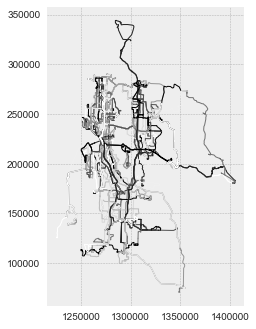

In [10]:
transit.plot()

### Let's use indexing to get the type of the first element (they are all the same, so let's just print out one)

In [13]:
transit.geom_type[0]

'MultiLineString'

### now let's get the bounds of the first element

In [14]:
transit.geometry.bounds.loc[0]

minx    1.273444e+06
miny    2.230123e+05
maxx    1.276067e+06
maxy    2.454039e+05
Name: 0, dtype: float64

### Plot the Minimum Bounding Rectangles (MBRS) of our multilines

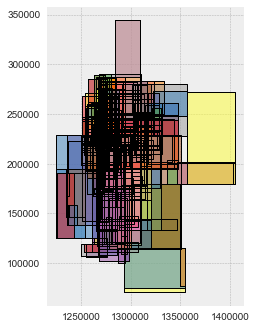

In [17]:
transit.envelope.plot()

### Let's read in our second dataset

In [18]:
markets = gpd.read_file(os.path.join(data_pth, "farmers_markets.shp"))

### And examine the top five rows

In [20]:
markets.head()

,ABB_NAME,ADDRESS,CITY,CODE,COUNTYNAME,CRDITDEBIT,DAYOFWEEK,EBTFDSTAMP,ENDTIME,END_DATE,ESITE,FEATURE_ID,LOCATION,NAME,STARTTIME,START_DATE,WEBSITE,ZIPCODE,geometry
0,Steilacoom Farmers Market,Wilkes and Lafayette Street,Steilacoom,903,Pierce,FALSE,Wednesdays,FALSE\n,7:00:00 PM,2012-08-29,0,903014,Corner of Lafayette & Wilkes Street,Steilacoom Farmers Market,3:00:00 PM,2012-06-13,http://www.steilacoomfarmersmarket.org,98388,POINT (1201262.459924191 68070.77015243471)
1,Gig Harbor Farmers Market,6808 Kimball Drive,Gig Harbor,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-09-02,0,903015,4701 Pt. Fosdick Drive,Gig Harbor Farmers Market,8:30:00 AM,2012-04-07,http://www.gigharborfarmersmarket.com,98335,POINT (1205476.960025355 121975.359849602)
2,Gig Harbor Farmers Market,3207 Harborview Drive,Gig Harbor,903,Pierce,FALSE,Wednesdays,FALSE\n,5:00:00 PM,2012-09-26,0,903016,3207 Harborview Drive,Gig Harbor Farmers Market,12:00:00 PM,2012-06-06,http://www.gigharborfarmersmarket.com/,98335,POINT (1206799.020045281 125593.2801071852)
3,Kingston Farmers Market,25877 Washington Blvd. NE,Kingston,903,Kitsap,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-10-20,0,903018,Corner of Central Avenue & Washington Boulevard,Kingston Farmers Market,9:00:00 AM,2012-05-05,http://www.kingstonfarmersmarket.com/,98346,POINT (1231796.050103605 295207.8001294434)
4,Proctor Farmers Market,North 27th and Proctor Street,Tacoma,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-12-22,0,903020,North 27th Street & Proctor Street,Proctor Farmers Market,9:00:00 AM,2012-03-31,http://www.proctorfarmersmarket.com,98407,POINT (1229393.429908857 103531.3701628596)


In [45]:
markets['ABB_NAME']

0                   Steilacoom Farmers Market
1                   Gig Harbor Farmers Market
2                   Gig Harbor Farmers Market
3                     Kingston Farmers Market
4                      Proctor Farmers Market
5            Tacoma 6th Avenue Farmers Market
6                       Vashon Farmers Market
7              Tacoma Broadway Farmers Market
8                     Magnolia Farmers Market
9                 West Seattle Farmers Market
10                     Ballard Farmers Market
11                     Phinney Farmers Market
12                   Shoreline Farmers Market
13                          Pike Place Market
14                  Pike Place Market Exp-SLU
15                 Wallingford Farmers Market
16              Pike Place Market Exp-Seattle
17       Des Moines Waterfront Farmers Market
18             Broadway Sunday Farmers Market
19         University District Farmers Market
20                   Lake City Farmers Market
21                     Madrona Far

### Check out the coordinate system

In [22]:
markets.crs

{u'ellps': u'GRS80',
 u'lat_0': 47,
 u'lat_1': 47.5,
 u'lat_2': 48.73333333333333,
 u'lon_0': -120.8333333333333,
 u'no_defs': True,
 u'proj': u'lcc',
 u'towgs84': u'0,0,0,0,0,0,0',
 u'units': u'us-ft',
 u'x_0': 500000.0000000001,
 u'y_0': 0}

### We are going to be intersecting, so its improtant to verify that the coordainte systems of our data are the same!

In [24]:
markets.crs == transit.crs

True

### Whew, they are the same. Otherwise we would have to reproject one or both

### Now let's plot

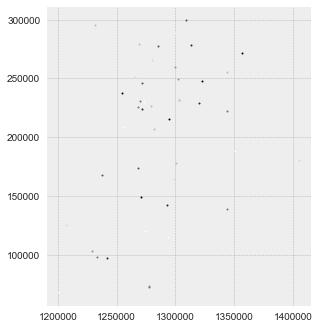

In [26]:
markets.plot()

### Let's plot both our datasets on the same plot

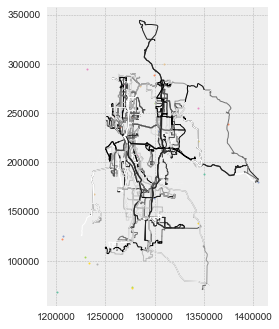

In [12]:
transit.plot(ax=markets.plot(cmap='Set2', alpha=1), alpha=1)

### Cool! But I think we can do better

### Let's play with some plotting settings to see if we can visualize this a bit better

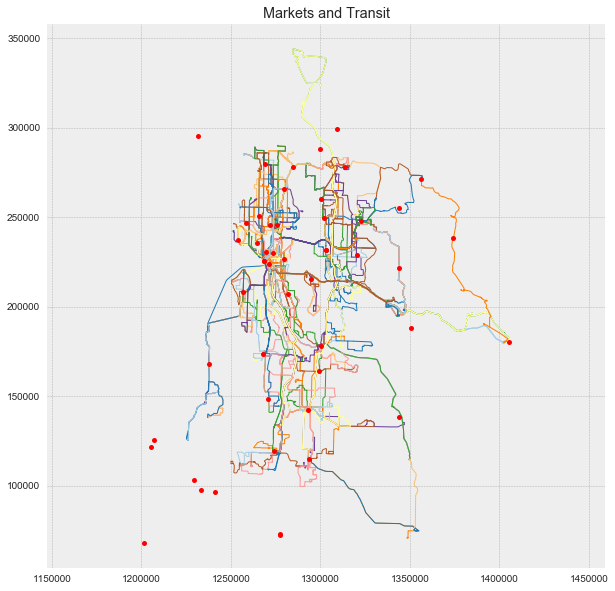

In [55]:
f, ax = plt.subplots(1, figsize=(10, 10))
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
transit.plot(cmap='Paired', alpha=1, linewidth=1, ax=ax)
markets.plot(alpha=1, ax=ax, marker='o', color='red', markersize=5)
ax.set_ylim([-100, 100])
ax.set_title('Markets and Transit')
plt.axis('equal');

### Much better. Now let's start our analysis

### Let's buffer our markets by 10000 feet, and add that to a variable, circles

In [31]:
circles = markets.buffer(10000)

### What type are these circles?

In [32]:
type(circles)

geopandas.geoseries.GeoSeries

### Now let's plot

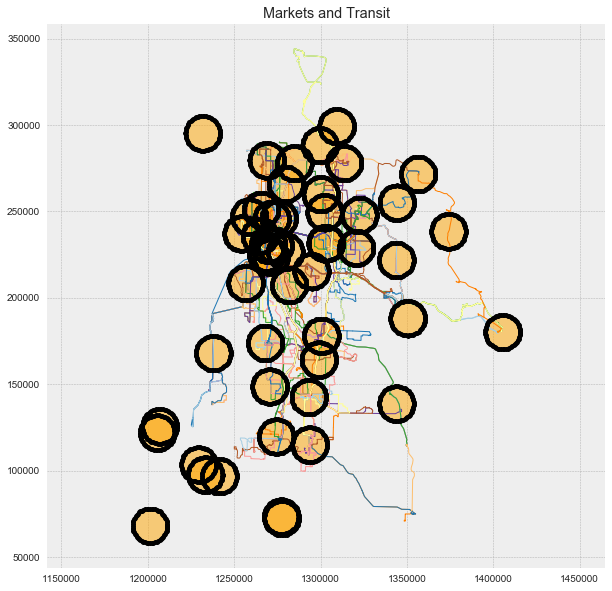

In [119]:
f, ax = plt.subplots(1, figsize=(10, 10))
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
transit.plot(cmap='Paired', alpha=1, linewidth=1, ax=ax)
circles.plot(ax=ax, marker='o', color='orange', markersize=5)
ax.set_ylim([-100, 100])
ax.set_title('Markets and Transit')
plt.axis('equal');

### Good. Now let's find out which of these circles  does not intersect a transit route

For some reason, before we can intersect, we need all of the routes to be one feature. After carefully [reading the docs](http://geopandas.org/reference.html?highlight=unary_union#GeoSeries.unary_union), we decide that unary_union is the tool for the job. We'll use this on our transit data. This may take a few moments.

In [33]:
trans_union = transit.unary_union

### Whew, let's get on with it. Let's check on the type of our new routes union

In [34]:
type(trans_union)

shapely.geometry.multilinestring.MultiLineString

[Read the docs](http://geopandas.org/data_structures.html) to find the right syntax to perform our intersect. Assign it to a new variable. (This may take a few moments)

In [35]:
intersect = circles.intersects(trans_union)

### Cool, let's see what we've got now
intersect is now an array of booleans, one for each record in the market table

In [36]:
intersect

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23    False
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33    False
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
dtype: bool

### We can work with this. Let's check out its type.

In [39]:
type(intersect)

pandas.core.series.Series

So intersect is a series of booleans, one for each market buffer. The value is True if there was an intersection, 
and False if there was not. Its the market buffers that do NOT intersect that interest us. So how can we get the opposite of this series?


Here's one way:

In [40]:
for i in intersect:
    print(not i)

True
True
True
True
True
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


### Let's look at the markets that have a True value for the intersect
These are the ones that intersect our transit routes

In [49]:
markets[intersect] 

,ABB_NAME,ADDRESS,CITY,CODE,COUNTYNAME,CRDITDEBIT,DAYOFWEEK,EBTFDSTAMP,ENDTIME,END_DATE,ESITE,FEATURE_ID,LOCATION,NAME,STARTTIME,START_DATE,WEBSITE,ZIPCODE,geometry
6,Vashon Farmers Market,17519 Vashon Highway SW,Vashon,903,King,TRUE,Saturdays,TRUE\n,2:00:00 PM,2012-12-15,0,903023,The Village Green; Vashon Highway & Bank Road,Vashon Farmers Market,10:00:00 AM,2012-04-07,http://www.vigavashon.org,98070,POINT (1237958.429839194 168036.3599190265)
8,Magnolia Farmers Market,West McGraw and 33rd Ave West,Seattle,903,King,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-09-29,0,903025,33rd Avenue W & West McGraw Street,Magnolia Farmers Market,10:00:00 AM,2012-06-09,http://www.seattlefarmersmarkets.org,98199,POINT (1254215.759857267 237237.2999289334)
9,West Seattle Farmers Market,44th Avenue SW & SW Alaska Street,Seattle,903,King,FALSE,Sundays,TRUE\n,2:00:00 PM,2012-12-30,0,903026,California Avenue SW & SW Alaska Street,West Seattle Farmers Market,10:00:00 AM,2012-01-01,http://www.seattlefarmersmarkets.org,98116,POINT (1256595.329901278 208549.5000211895)
10,Ballard Farmers Market,5300 Ballard Ave NW,Seattle,903,King,FALSE,Sundays; year round,TRUE\n,3:00:00 PM,2012-12-31,0,903027,Ballard Avenue NW between Vernon Place NW & 22...,Ballard Farmers Market,10:00:00 AM,2012-01-01,http://ballardfarmersmarket.wordpress.com,98117,POINT (1258603.770110101 246999.2800768614)
11,Phinney Farmers Market,67th & Phinney Avenue North,Seattle,903,King,FALSE,Fridays,FALSE\n,7:00:00 PM,2012-10-05,0,903028,Avenue N & N 67th Street,Phinney Farmers Market,3:00:00 PM,2012-06-01,http://www.seattlefarmersmarkets.org,98105,POINT (1265583.050114781 250982.3498665988)
12,Shoreline Farmers Market,17500 Midvale Ave N,Shoreline,903,King,None,Saturdays,\n,3:00:00 PM,2012-10-06,0,903029,Shoreline City Hall,Shoreline Farmers Market,10:00:00 AM,2012-06-16,None,98133,POINT (1268854.809975445 279558.6001286805)
13,Pike Place Market,1531 Western Avenue,Seattle,903,King,FALSE,Monday through Saturday,FALSE\n,6:00:00 PM,2012-12-31,0,903030,Pike Place between Pine Street & Virginia Street,Pike Place Market,9:00:00 AM,2012-01-01,http://www.pikeplacemarket.org,98101,POINT (1268536.039943695 225641.8798783571)
14,Pike Place Market Exp-SLU,410 Terry Ave N,Seattle,903,King,FALSE,Thursdays,FALSE\n,2:30:00 PM,2012-09-27,0,903032,410 Terry Ave North,Pike Place Market Express @ South Lake Union,10:30:00 AM,2012-06-21,http://www.pikeplacemarket.org,98109,POINT (1269622.960013941 230692.1000928581)
15,Wallingford Farmers Market,4649 Sunnyside Avenue North,Seattle,903,King,FALSE,Wednesdays,TRUE\n,7:00:00 PM,2012-09-26,0,903033,4649 Sunnyside Avenue North,Wallingford Farmers Market,3:30:00 PM,2012-05-30,http://www.wallingfordfarmersmarket.wordpress.com,98103,POINT (1271640.890033186 245719.6701032668)
16,Pike Place Market Exp-Seattle,600 Fourth Ave,Seattle,903,King,FALSE,Tuesdays,FALSE\n,2:00:00 PM,2012-09-25,0,903034,City Hall Plaza between Cherry & James Streets,Pike Place Market Express @ Seattle City Hall,10:00:00 AM,2012-06-19,http://www.pikeplacemarket.org,98101,POINT (1271215.300005108 223838.7801381052)


### We can get the markets that DON'T intersect by ding the same thing, but with a ~ !

In [50]:
markets[~intersect] 

,ABB_NAME,ADDRESS,CITY,CODE,COUNTYNAME,CRDITDEBIT,DAYOFWEEK,EBTFDSTAMP,ENDTIME,END_DATE,ESITE,FEATURE_ID,LOCATION,NAME,STARTTIME,START_DATE,WEBSITE,ZIPCODE,geometry
0,Steilacoom Farmers Market,Wilkes and Lafayette Street,Steilacoom,903,Pierce,FALSE,Wednesdays,FALSE\n,7:00:00 PM,2012-08-29,0,903014,Corner of Lafayette & Wilkes Street,Steilacoom Farmers Market,3:00:00 PM,2012-06-13,http://www.steilacoomfarmersmarket.org,98388,POINT (1201262.459924191 68070.77015243471)
1,Gig Harbor Farmers Market,6808 Kimball Drive,Gig Harbor,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-09-02,0,903015,4701 Pt. Fosdick Drive,Gig Harbor Farmers Market,8:30:00 AM,2012-04-07,http://www.gigharborfarmersmarket.com,98335,POINT (1205476.960025355 121975.359849602)
2,Gig Harbor Farmers Market,3207 Harborview Drive,Gig Harbor,903,Pierce,FALSE,Wednesdays,FALSE\n,5:00:00 PM,2012-09-26,0,903016,3207 Harborview Drive,Gig Harbor Farmers Market,12:00:00 PM,2012-06-06,http://www.gigharborfarmersmarket.com/,98335,POINT (1206799.020045281 125593.2801071852)
3,Kingston Farmers Market,25877 Washington Blvd. NE,Kingston,903,Kitsap,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-10-20,0,903018,Corner of Central Avenue & Washington Boulevard,Kingston Farmers Market,9:00:00 AM,2012-05-05,http://www.kingstonfarmersmarket.com/,98346,POINT (1231796.050103605 295207.8001294434)
4,Proctor Farmers Market,North 27th and Proctor Street,Tacoma,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-12-22,0,903020,North 27th Street & Proctor Street,Proctor Farmers Market,9:00:00 AM,2012-03-31,http://www.proctorfarmersmarket.com,98407,POINT (1229393.429908857 103531.3701628596)
5,Tacoma 6th Avenue Farmers Market,611 North Pine Street,Tacoma,903,Pierce,TRUE,Tuesdays,TRUE\n,7:00:00 PM,2012-09-25,0,903022,North Pine Street between 6th Avenue and North...,Tacoma 6th Avenue Farmers Market,3:00:00 PM,2012-05-01,http://www.tacomafarmersmarket.com,98406,POINT (1233242.560005859 97720.28992152214)
7,Tacoma Broadway Farmers Market,936 Broadway Avenue,Tacoma,903,Pierce,TRUE,Thursdays,TRUE\n,3:00:00 PM,2012-10-25,0,903024,Broadway between 9th and 11th,Tacoma Broadway Farmers Market,10:00:00 AM,2012-05-03,http://www.tacomafarmersmarket.com/,98402,POINT (1241420.230002195 96818.48004534841)
22,Puyallup Farmers Market,333 South Meridian,Puyallup,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-10-13,0,903042,333 South Meridian,Puyallup Farmers Market,9:00:00 AM,2012-04-14,http://www.puyallupmainstreet.com,98371,POINT (1277243.249891445 73410.35986693203)
23,Puyallup Farmers Market,330 South Meridian,Puyallup,903,Pierce,FALSE,Sundays,FALSE\n,3:00:00 PM,2012-09-02,0,903043,333 South Meridian,Puyallup Farmers Market,10:00:00 AM,2012-05-27,http://www.puyallupmainstreet.com,98371,POINT (1277475.120162606 72530.56011734903)
33,South County Community Farmers Market,3805 Maltby Road,Bothell,903,Snohomish,TRUE,Wednesdays,FALSE\n,8:00:00 PM,2012-09-26,0,903053,3805 Maltby Road,South County Community Farmers Market,4:00:00 PM,2012-06-06,http://www.parkridgeonline.org/market,98012,POINT (1309301.799947441 299346.3699362725)


### Let's look at just the Names

In [55]:
markets[~intersect]['ABB_NAME']

0                 Steilacoom Farmers Market
1                 Gig Harbor Farmers Market
2                 Gig Harbor Farmers Market
3                   Kingston Farmers Market
4                    Proctor Farmers Market
5          Tacoma 6th Avenue Farmers Market
7            Tacoma Broadway Farmers Market
22                  Puyallup Farmers Market
23                  Puyallup Farmers Market
33    South County Community Farmers Market
Name: ABB_NAME, dtype: object

### Hooray! This is the answer to our GIS problem!

### Now let's plot

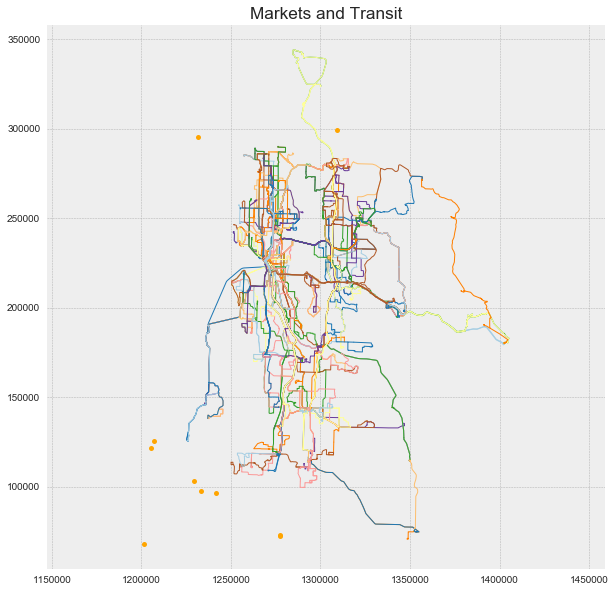

In [52]:
final = markets[~intersect]
f, ax = plt.subplots(1, figsize=(10, 10))
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
transit.plot(cmap='Paired', alpha=1, linewidth=1, ax=ax)
final.plot(ax=ax, marker='o', color='orange', markersize=5)
ax.set_ylim([-100, 100])
ax.set_title('Markets and Transit')
plt.axis('equal');

In [53]:
print('Fin!')

Fin!
